In [1]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [21]:
stock = yf.Ticker("AAPL")
stock = stock.history(period='2y')


In [22]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-05 00:00:00-04:00,161.608327,164.222419,161.400381,163.727325,56697000,0.23,0.0
2022-08-08 00:00:00-04:00,164.737294,166.163164,162.588591,163.252014,60276900,0.00,0.0
2022-08-09 00:00:00-04:00,162.410367,164.192706,161.647920,163.301529,63135500,0.00,0.0
2022-08-10 00:00:00-04:00,166.034444,167.678157,165.262100,167.579147,70170500,0.00,0.0
2022-08-11 00:00:00-04:00,168.391087,169.311968,166.539443,166.836502,57149200,0.00,0.0
...,...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800,0.00,0.0
2024-07-31 00:00:00-04:00,221.440002,223.820007,220.630005,222.080002,50036300,0.00,0.0
2024-08-01 00:00:00-04:00,224.369995,224.479996,217.020004,218.360001,62501000,0.00,0.0


In [23]:
del stock['Dividends']
del stock['Stock Splits']

In [24]:
stock

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-05 00:00:00-04:00,161.608327,164.222419,161.400381,163.727325,56697000
2022-08-08 00:00:00-04:00,164.737294,166.163164,162.588591,163.252014,60276900
2022-08-09 00:00:00-04:00,162.410367,164.192706,161.647920,163.301529,63135500
2022-08-10 00:00:00-04:00,166.034444,167.678157,165.262100,167.579147,70170500
2022-08-11 00:00:00-04:00,168.391087,169.311968,166.539443,166.836502,57149200
...,...,...,...,...,...
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800
2024-07-31 00:00:00-04:00,221.440002,223.820007,220.630005,222.080002,50036300
2024-08-01 00:00:00-04:00,224.369995,224.479996,217.020004,218.360001,62501000


<Axes: xlabel='Date'>

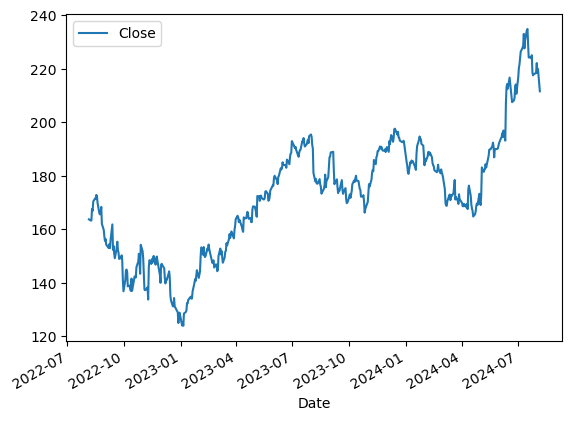

In [25]:
stock.plot.line(y="Close")

In [26]:
stock["Next Days Close"] = stock['Close'].shift(-1)

In [27]:
stock

,Open,High,Low,Close,Volume,Next Days Close
Date,,,,,,
2022-08-05 00:00:00-04:00,161.608327,164.222419,161.400381,163.727325,56697000,163.252014
2022-08-08 00:00:00-04:00,164.737294,166.163164,162.588591,163.252014,60276900,163.301529
2022-08-09 00:00:00-04:00,162.410367,164.192706,161.647920,163.301529,63135500,167.579147
2022-08-10 00:00:00-04:00,166.034444,167.678157,165.262100,167.579147,70170500,166.836502
2022-08-11 00:00:00-04:00,168.391087,169.311968,166.539443,166.836502,57149200,170.411072
...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800,222.080002
2024-07-31 00:00:00-04:00,221.440002,223.820007,220.630005,222.080002,50036300,218.360001
2024-08-01 00:00:00-04:00,224.369995,224.479996,217.020004,218.360001,62501000,219.860001


In [28]:
stock['change'] = (stock['Next Days Close'] > stock['Close']).astype(int)

In [29]:
stock

,Open,High,Low,Close,Volume,Next Days Close,change
Date,,,,,,,
2022-08-05 00:00:00-04:00,161.608327,164.222419,161.400381,163.727325,56697000,163.252014,0
2022-08-08 00:00:00-04:00,164.737294,166.163164,162.588591,163.252014,60276900,163.301529,1
2022-08-09 00:00:00-04:00,162.410367,164.192706,161.647920,163.301529,63135500,167.579147,1
2022-08-10 00:00:00-04:00,166.034444,167.678157,165.262100,167.579147,70170500,166.836502,0
2022-08-11 00:00:00-04:00,168.391087,169.311968,166.539443,166.836502,57149200,170.411072,1
...,...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800,222.080002,1
2024-07-31 00:00:00-04:00,221.440002,223.820007,220.630005,222.080002,50036300,218.360001,0
2024-08-01 00:00:00-04:00,224.369995,224.479996,217.020004,218.360001,62501000,219.860001,1


In [30]:
import numpy as np
def look_back_period(X, y, look_back_window=20):
    X_lstm, y_lstm, = [],[]
    for i in range(len(X)- look_back_window):
        X_lstm.append(X[i:i+look_back_window])
        y_lstm.append(y[i+look_back_window])
    return np.array(X_lstm), np.array(y_lstm)


In [31]:
# Drop rows with NaN target values
stock = stock.dropna(subset=['Next Days Close', 'change'])
stock = stock.drop(columns = "Next Days Close")

# Split our preprocessed data into our features and target arrays
y = stock['change']
X = stock.drop(columns=['change'])

# Preserve the index of the original DataFrame
original_index = X.index

In [32]:
# import numpy as np
# def look_back_period(X, y, look_back_window=20):
#     X_lstm, y_lstm, = [],[]
#     for i in range(len(X)- look_back_window):
#         X_lstm.append(X[i: - look_back_window])
#         y_lstm.append(y[i+look_back_window])
#     return np.array(X_lstm), np.array(y_lstm)


In [33]:
# Normalize data:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
X_scaled, y = look_back_period(X_scaled, y)

In [39]:
X_scaled.shape, y.shape

((481, 20, 5), (481,))

In [40]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
# Rebuild X_test DataFrame to restore index information
#X_test_df = pd.DataFrame(X_test, index=original_index[-len(X_test):], columns=X.columns)

In [41]:
# Define the model
#model = tf.keras.models.Sequential([
#    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
#    tf.keras.layers.Dense(32, activation='relu'),
#    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
#])

In [42]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [43]:
X_train.shape

(384, 20, 5)

In [59]:
model = Sequential()

model.add(LSTM(units=50, activation="tanh", return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))

model.add(LSTM(units=30,return_sequences=True, activation="tanh",))
model.add(Dropout(0.2))

model.add(LSTM(units=10, activation="tanh"))

model.add(Dense(1, activation="sigmoid"))


/Users/keycaughey/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=10)

Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5059 - loss: 0.6992 - val_accuracy: 0.4026 - val_loss: 0.7231
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5524 - loss: 0.6869 - val_accuracy: 0.4026 - val_loss: 0.7175
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5089 - loss: 0.6950 - val_accuracy: 0.4416 - val_loss: 0.7018
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5010 - loss: 0.6953 - val_accuracy: 0.4026 - val_loss: 0.7165
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5212 - loss: 0.6904 - val_accuracy: 0.4026 - val_loss: 0.7200
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5513 - loss: 0.6841 - val_accuracy: 0.4026 - val_loss: 0.7291
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5141 - loss: 0.6857 - val_accuracy: 0.4935 - val_loss: 0.7080
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5395 - loss: 0.6885 - val_accuracy: 0.4286 - 

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6365 - loss: 0.6162 - val_accuracy: 0.5195 - val_loss: 0.7148
Epoch 52/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5651 - loss: 0.6441 - val_accuracy: 0.5195 - val_loss: 0.7084
Epoch 53/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5987 - loss: 0.6299 - val_accuracy: 0.5455 - val_loss: 0.7019
Epoch 54/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6136 - loss: 0.6292 - val_accuracy: 0.5455 - val_loss: 0.7043
Epoch 55/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6413 - loss: 0.6285 - val_accuracy: 0.5325 - val_loss: 0.7162
Epoch 56/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6090 - loss: 0.6203 - val_accuracy: 0.5065 - val_loss: 0.7189
Epoch 57/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6455 - loss: 0.6249 - val_accuracy: 0.5195 - val_loss: 0.6912
Epoch 58/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6631 - loss: 0.5999 - val_accuracy: 0.5325 - val_lo

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6608 - loss: 0.6019 - val_accuracy: 0.5455 - val_loss: 0.7214
Epoch 102/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6514 - loss: 0.5568 - val_accuracy: 0.5714 - val_loss: 0.7447
Epoch 103/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7034 - loss: 0.5623 - val_accuracy: 0.5325 - val_loss: 0.7197
Epoch 104/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7021 - loss: 0.5648 - val_accuracy: 0.5455 - val_loss: 0.7192
Epoch 105/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7151 - loss: 0.5587 - val_accuracy: 0.5065 - val_loss: 0.7858
Epoch 106/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6820 - loss: 0.5638 - val_accuracy: 0.5325 - val_loss: 0.7535
Epoch 107/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7175 - loss: 0.5679 - val_accuracy: 0.5195 - val_loss: 0.8517
Epoch 108/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7001 - loss: 0.5814 - val_accuracy: 0.5325 -

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7747 - loss: 0.4837 - val_accuracy: 0.5455 - val_loss: 1.0032
Epoch 152/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7811 - loss: 0.4879 - val_accuracy: 0.3896 - val_loss: 0.9549
Epoch 153/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7319 - loss: 0.5103 - val_accuracy: 0.4935 - val_loss: 1.0020
Epoch 154/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7426 - loss: 0.5088 - val_accuracy: 0.5065 - val_loss: 0.9611
Epoch 155/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7477 - loss: 0.4943 - val_accuracy: 0.5325 - val_loss: 0.9260
Epoch 156/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7387 - loss: 0.5093 - val_accuracy: 0.4675 - val_loss: 1.0364
Epoch 157/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7941 - loss: 0.4649 - val_accuracy: 0.5065 - val_loss: 0.9920
Epoch 158/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7292 - loss: 0.5089 - val_accuracy: 0.4805 -

In [62]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {model_loss}, Test Accuracy: {model_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5644 - loss: 1.0731 
Test Loss: 1.0151171684265137, Test Accuracy: 0.5463917255401611


In [63]:
# Make predictions
predictions = model.predict(X_test).round().flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [64]:
# Create a DataFrame for predictions with the index of X_test_df
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])

In [65]:
precision_score(y_test,predictions)

0.6440677966101694

In [70]:

train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
num_epochs = 200
x_axis = [i for i in range(num_epochs)]


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [72]:
def analysis_plot(x,train_data, val_data):
    plt.figure(figsize=(12,6))
    plt.plot(x,train_data,label = "train data")
    plt.plot(x,val_data, label = "val data")
    plt.legend()
    plt.plot();

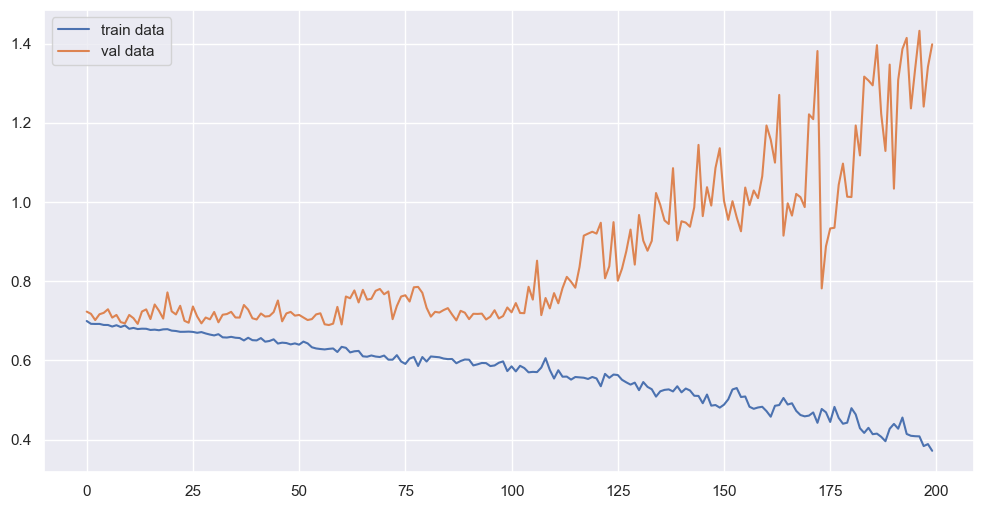

In [73]:
analysis_plot(x=x_axis,train_data = train_loss, val_data=val_loss)

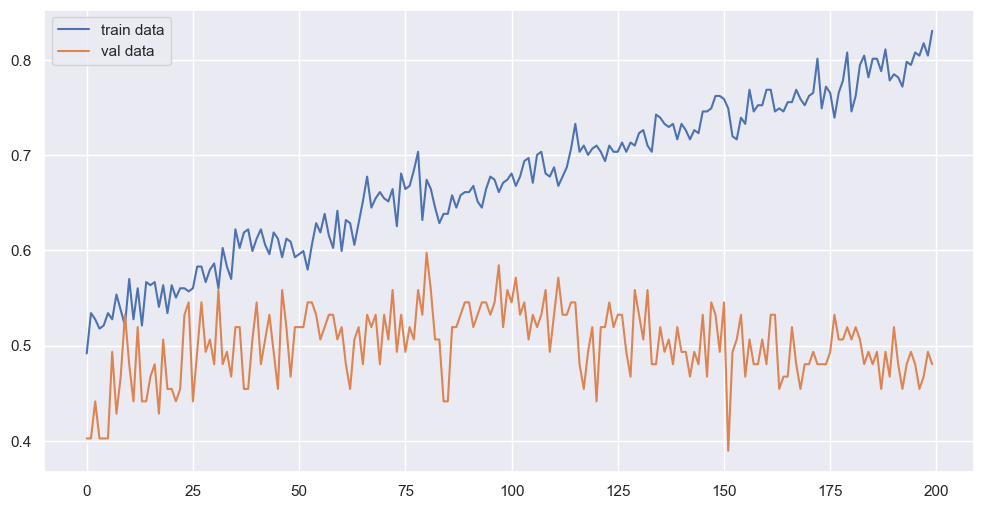

In [74]:
analysis_plot(x=x_axis,train_data = train_acc, val_data = val_acc)

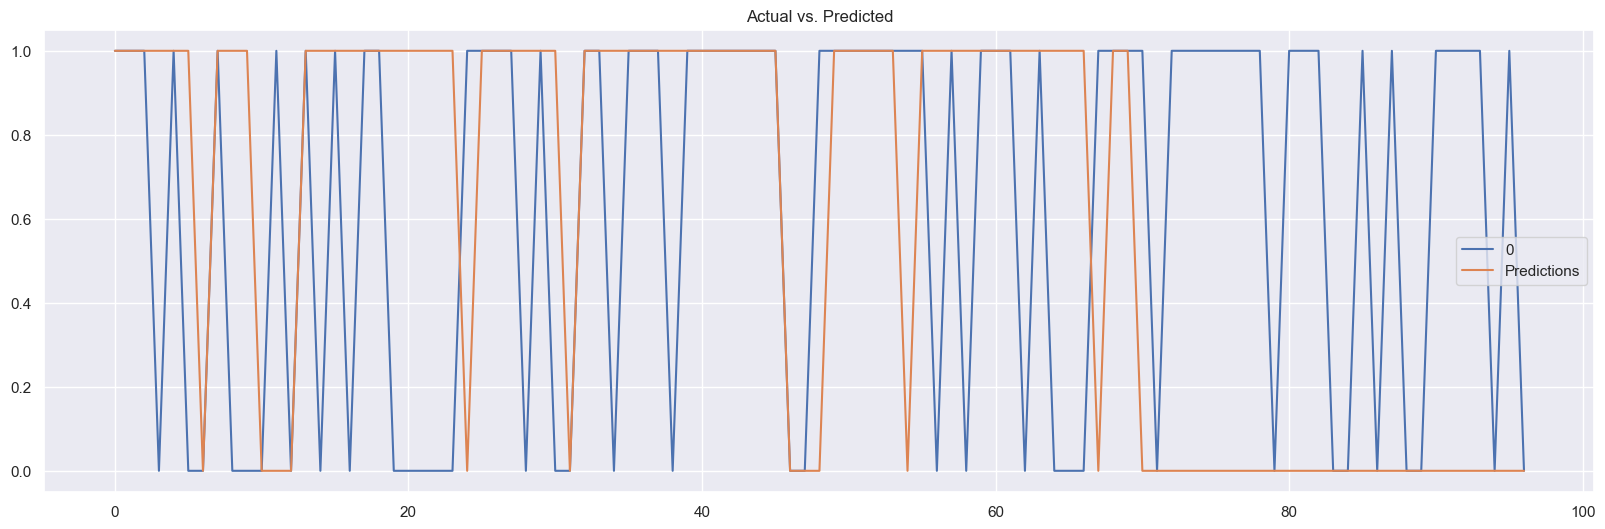

In [86]:
# Combine actual values and predictions
combined = pd.concat([pd.Series(y_test), predictions_df], axis=1)

# Plot the combined DataFrame
# plt.figure(figsize = (20,6))
combined.plot(title='Actual vs. Predicted', figsize=(20,6))
# plt.figure(figsize=(20,6))
plt.show()

$$ y_{hat} = f(x_{faetures})$$

In [80]:
combined.columns

Index([0, 'Predictions'], dtype='object')

In [83]:
# plt.scatter(combined[0], combined.Predictions)

In [77]:
predictions_df

,Predictions
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
92,0.0
93,0.0
94,0.0
95,0.0


In [ ]:
# Prepare latest data for prediction
latest_data = X_scaled[-1].reshape(1, -1)  # Take the most recent row
latest_data_df = pd.DataFrame(latest_data, columns=X.columns)

In [ ]:
# Make prediction for the next day
next_day_prediction = model.predict(latest_data_df).round().flatten()[0]
print(f'Prediction for the next day: {"Stock Will Go Up" if next_day_prediction == 1 else "Stock Will Go Down"}')

In [ ]:
# Define the ticker list
import pandas as pd
tickers_list = ['SMCI', 'NVDA', 'ANET', 'NTAP', 'AVGO', 'KLAC', 'FICO', 'GDDY', 'MPWR', 'TYL']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2024-1-1')['Close']

# Plot all the close prices
((data.plot(figsize=(10, 7))))
plt.legend()
plt.title("Close Value", fontsize=16)

# Define the labels
plt.ylabel('Close Value', fontsize=14)
plt.xlabel('Time', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()